# Timing the scalar-vector functions

Use magic command [%timeit](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) to time `template.scalar_vec_real_XXXXX` functions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import template as temp

In [2]:
# number of elements forming the vectors
N = np.array([100, 300, 500, 700, 1000])

In [3]:
for Ni in N:
    print(Ni)

100
300
500
700
1000


In [4]:
list_time_dumb = []
list_time_numpy = []
list_time_numba = []
for Ni in N:
    scalar = 1
    vector = np.ones(Ni)
    # scalar_vec_real_dumb
    time = %timeit -o -n 100 -r 100 temp.scalar_vec_real_dumb(scalar, vector)
    list_time_dumb.append(time.average)
    # scalar_vec_real_numpy
    time = %timeit -o -n 100 -r 100 temp.scalar_vec_real_numpy(scalar, vector)
    list_time_numpy.append(time.average)
    # scalar_vec_real_numba
    time = %timeit -o -n 100 -r 100 temp.scalar_vec_real_numba(scalar, vector)
    list_time_numba.append(time.average)

398 µs ± 25 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
3.12 µs ± 302 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 2458.41 times longer than the fastest. This could mean that an intermediate result is being cached.
51 µs ± 487 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.11 ms ± 31.1 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
3.62 µs ± 355 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
2.4 µs ± 258 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.89 ms ± 40.6 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
3.94 µs ± 607 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
2.39 µs ± 393 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
2.6 ms ± 26.8 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
4.46 µs ± 1.1 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
2.59 µs ± 233 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
3.83 m

In [5]:
list_time_dumb = np.array(list_time_dumb)
list_time_numpy = np.array(list_time_numpy)
list_time_numba = np.array(list_time_numba)

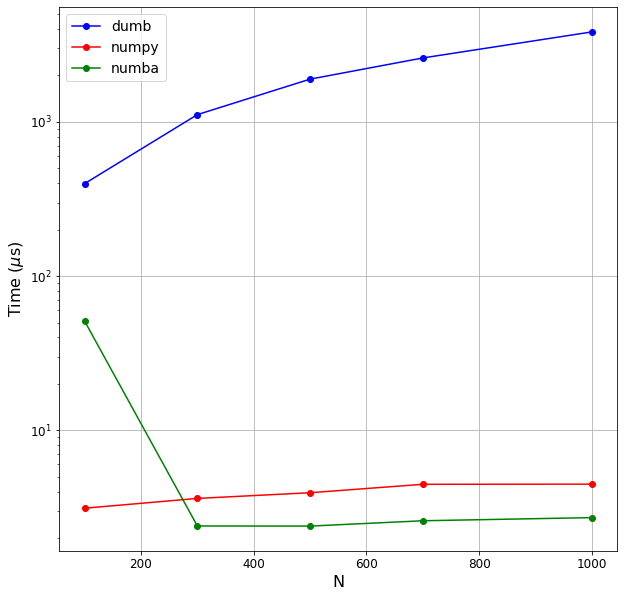

In [6]:
plt.figure(figsize=(10,10))
plt.plot(N, list_time_dumb*1e6, 'bo-', label = 'dumb')
plt.plot(N, list_time_numpy*1e6, 'ro-', label = 'numpy')
plt.plot(N, list_time_numba*1e6, 'go-', label = 'numba')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()